### DataFram and Dataset API

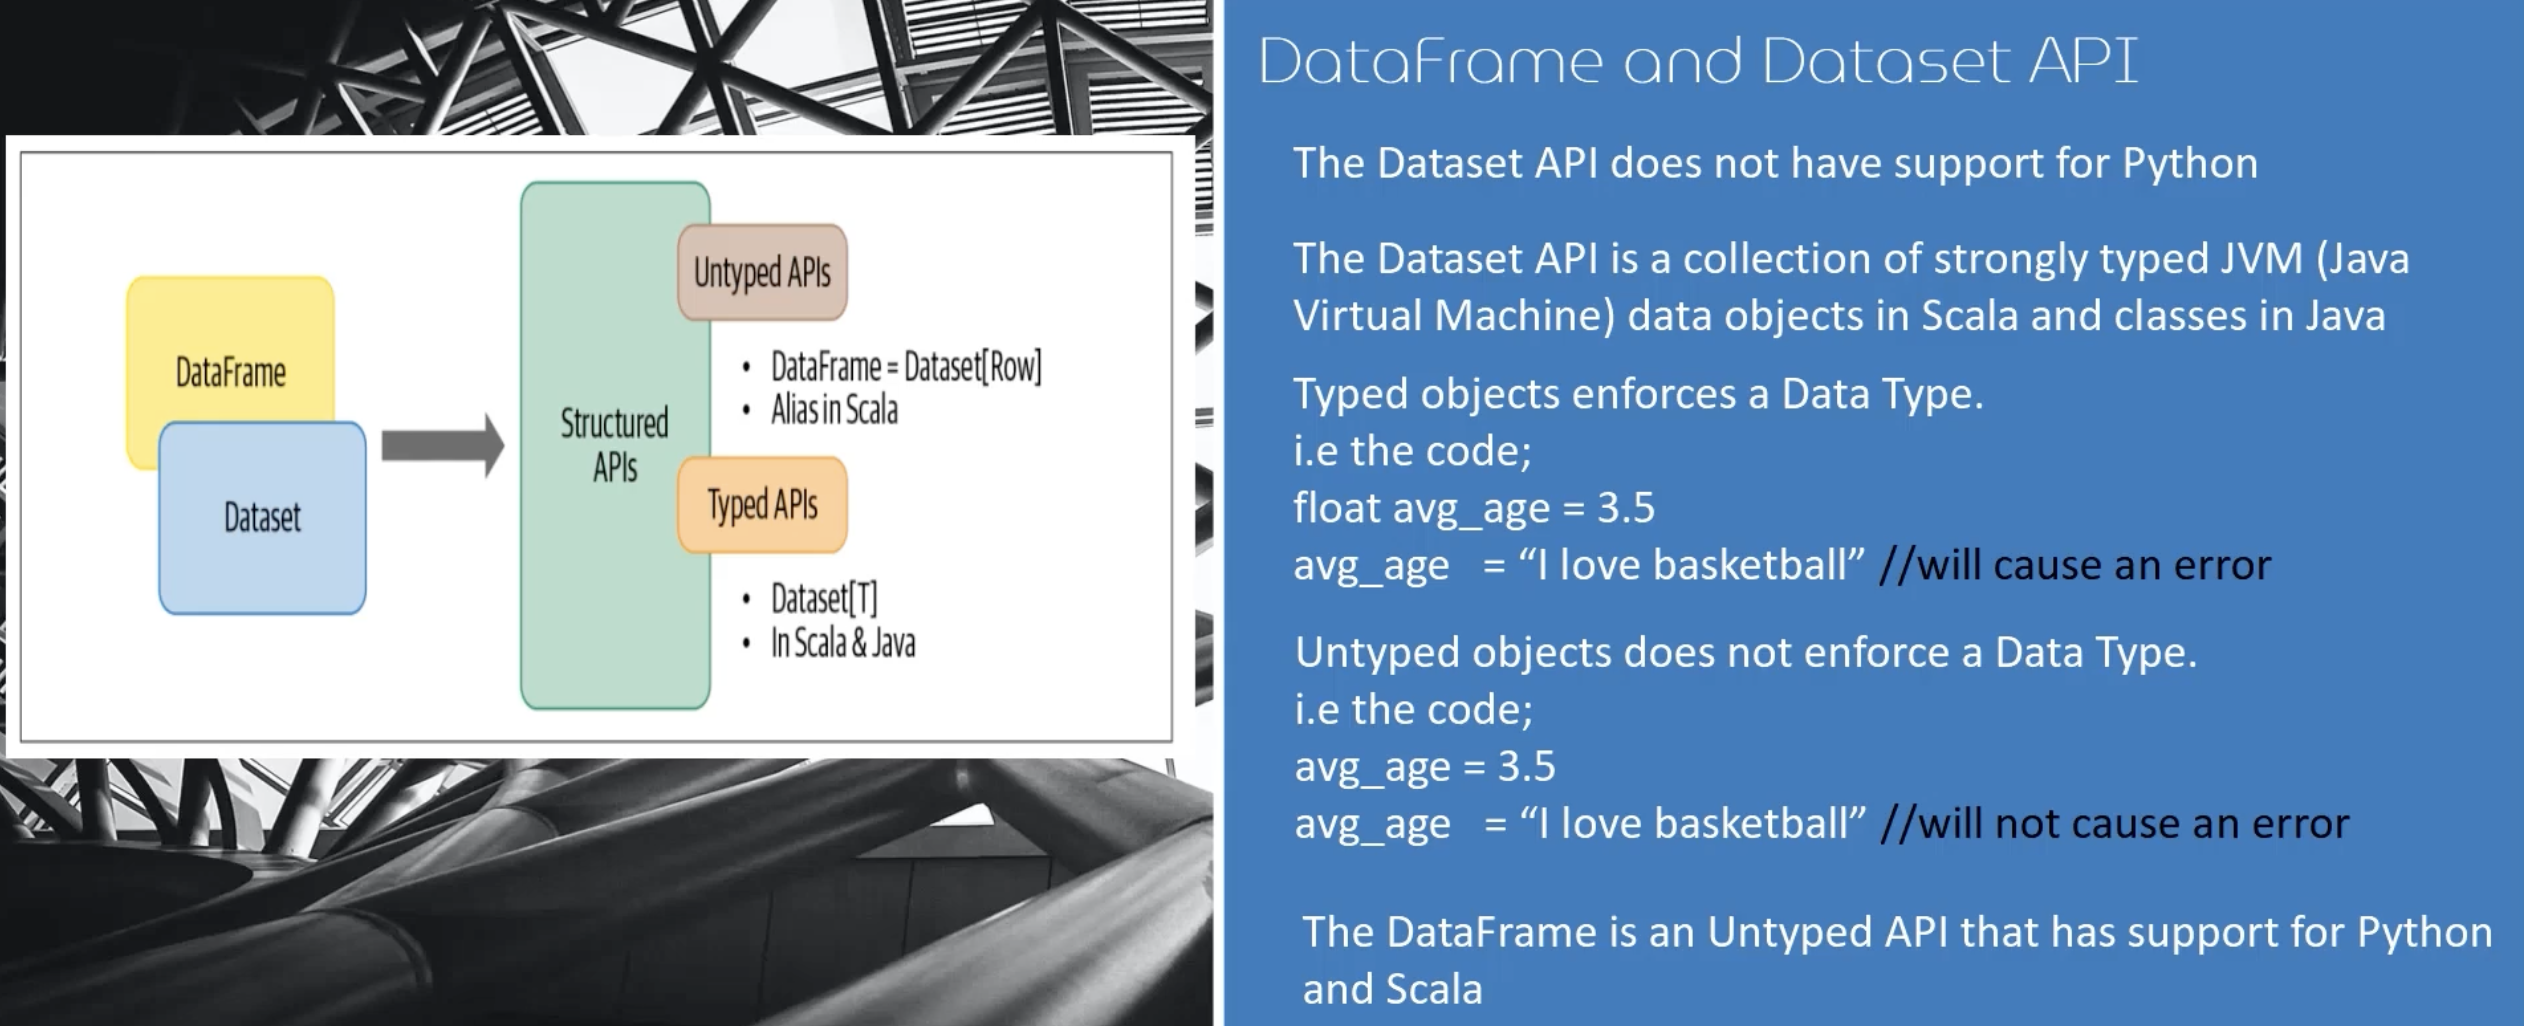

### Import library

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructField, StructType, IntegerType

spark = SparkSession.builder.appName("Dataframe_test").getOrCreate()

### Load people data and define schema

In [9]:
data = [("James","","Smith","36636","M",3000),
    ("Michael","Rose","","40288","M",4000),
    ("Robert","","Williams","42114","M",4000),
    ("Maria","Anne","Jones","39192","F",4000),
    ("Jen","Mary","Brown","","F",-1)
  ]

schema = StructType([
    StructField("FirstName", StringType(), True),
    StructField("MiddleName", StringType(), True),
    StructField("LastName", StringType(), True),
    StructField("ID", StringType(), True),
    StructField("Gender", StringType(), True),
    StructField("Salary", IntegerType(), True),

])

### Create DataFrame from data list and assign schema

In [10]:
df = spark.createDataFrame(data=data, schema=schema)
df.printSchema()

df.show(truncate=False)

root
 |-- FirstName: string (nullable = true)
 |-- MiddleName: string (nullable = true)
 |-- LastName: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Salary: integer (nullable = true)

+---------+----------+--------+-----+------+------+
|FirstName|MiddleName|LastName|ID   |Gender|Salary|
+---------+----------+--------+-----+------+------+
|James    |          |Smith   |36636|M     |3000  |
|Michael  |Rose      |        |40288|M     |4000  |
|Robert   |          |Williams|42114|M     |4000  |
|Maria    |Anne      |Jones   |39192|F     |4000  |
|Jen      |Mary      |Brown   |     |F     |-1    |
+---------+----------+--------+-----+------+------+



### Load data from CSV

In [11]:
sales_data_path = "/Users/alex/SourceCode/_Training_Spark/Apache-Spark-3-for-Data-Engineering-and-Analytics-with-Python-/Section 4 Resources/salesdata"

sales_df = spark.read.format("csv")\
                    .option("header",True)\
                    .option("inferSchema",True)\
                    .load(sales_data_path)

sales_df.printSchema()
sales_df.select("Order ID", "Price Each", "Product").show(10, truncate=False)
sales_df.count()

root
 |-- Order ID: integer (nullable = true)
 |-- Product: string (nullable = true)
 |-- Quantity Ordered: integer (nullable = true)
 |-- Price Each: double (nullable = true)
 |-- Order Date: string (nullable = true)
 |-- Purchase Address: string (nullable = true)

+--------+----------+--------------------------+
|Order ID|Price Each|Product                   |
+--------+----------+--------------------------+
|295665  |1700.0    |Macbook Pro Laptop        |
|295666  |600.0     |LG Washing Machine        |
|295667  |11.95     |USB-C Charging Cable      |
|295668  |149.99    |27in FHD Monitor          |
|295669  |11.95     |USB-C Charging Cable      |
|295670  |3.84      |AA Batteries (4-pack)     |
|295671  |11.95     |USB-C Charging Cable      |
|295672  |11.95     |USB-C Charging Cable      |
|295673  |99.99     |Bose SoundSport Headphones|
|295674  |2.99      |AAA Batteries (4-pack)    |
+--------+----------+--------------------------+
only showing top 10 rows



186850

### Output File to CSC

In [12]:
output_path = "./data/sales_data"

sales_df.write.format("parquet").mode("overwrite").save(output_path)

### Read JSON File

In [16]:
from pyspark.sql.types import ArrayType, FloatType, DateType, BooleanType

persons_schema = StructType([
    StructField("id",IntegerType(),True),
    StructField("first_name",StringType(),True),
    StructField("last_name",StringType(),True),
    StructField("fav_movies",ArrayType(StringType()),True),
    StructField("salary",FloatType(),True),
    StructField("image_url",StringType(),True),
    StructField("date_of_birth",DateType(),True),
    StructField("active",BooleanType(),True)
])

json_file_path = "/Users/alex/SourceCode/_Training_Spark/Apache-Spark-3-for-Data-Engineering-and-Analytics-with-Python-/Section 4 Resources/persons.json"
person_df = spark.read.json(json_file_path, persons_schema, multiLine=True)

person_df.printSchema()
person_df.show(10)

root
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- fav_movies: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- salary: float (nullable = true)
 |-- image_url: string (nullable = true)
 |-- date_of_birth: date (nullable = true)
 |-- active: boolean (nullable = true)

+---+----------+---------+--------------------+-------+--------------------+-------------+------+
| id|first_name|last_name|          fav_movies| salary|           image_url|date_of_birth|active|
+---+----------+---------+--------------------+-------+--------------------+-------------+------+
|  1|     Drucy|    Poppy|  [I giorni contati]|1463.36|http://dummyimage...|   1991-02-16|  true|
|  2|   Emelyne|    Blaza|[Musketeer, The, ...|3006.04|http://dummyimage...|   1991-11-02| false|
|  3|       Max|   Rettie|[The Forgotten Sp...|1422.88|http://dummyimage...|   1990-03-03| false|
|  4|    Ilario|     Kean|[Up Close and

###  Columns and Expressions

In [21]:
from pyspark.sql.functions import col, expr

# col
person_df.select(col("first_name"), col("last_name"), col("date_of_birth")).show(3)

# expr
person_df.select(expr("first_name"), expr("last_name"), expr("date_of_birth")).show(3)


+----------+---------+-------------+
|first_name|last_name|date_of_birth|
+----------+---------+-------------+
|     Drucy|    Poppy|   1991-02-16|
|   Emelyne|    Blaza|   1991-11-02|
|       Max|   Rettie|   1990-03-03|
+----------+---------+-------------+
only showing top 3 rows

+----------+---------+-------------+
|first_name|last_name|date_of_birth|
+----------+---------+-------------+
|     Drucy|    Poppy|   1991-02-16|
|   Emelyne|    Blaza|   1991-11-02|
|       Max|   Rettie|   1990-03-03|
+----------+---------+-------------+
only showing top 3 rows



### Create new full name column by concat_ws function

In [25]:
from pyspark.sql.functions import concat_ws

person_df.select(concat_ws(' ', col("first_name"), col("last_name")).alias("full_name"),
col("salary"),
(col("salary") * 1.10).alias("salary_increase")).show(10)

# Expr can handle the column expression
person_df.select(concat_ws(' ', col("first_name"), col("last_name")).alias("full_name"),
col("salary"),
(expr("salary * 1.10")).alias("salary_increase")).show(10)


+----------------+-------+------------------+
|       full_name| salary|   salary_increase|
+----------------+-------+------------------+
|     Drucy Poppy|1463.36| 1609.695983886719|
|   Emelyne Blaza|3006.04|3306.6440429687505|
|      Max Rettie|1422.88|1565.1680053710938|
|     Ilario Kean|3561.36| 3917.496118164063|
|    Toddy Drexel|4934.87|  5428.35712890625|
| Oswald Petrolli|1153.23| 1268.552978515625|
|   Adrian Clarey|1044.73| 1149.202978515625|
|Dominica Goodnow|1147.76|1262.5360107421875|
|   Emory Slocomb|1082.11|1190.3209838867188|
|   Jeremias Bode|3472.63|3819.8928710937503|
+----------------+-------+------------------+
only showing top 10 rows

+----------------+-------+------------------+
|       full_name| salary|   salary_increase|
+----------------+-------+------------------+
|     Drucy Poppy|1463.36| 1609.695983886719|
|   Emelyne Blaza|3006.04|3306.6440429687505|
|      Max Rettie|1422.88|1565.1680053710938|
|     Ilario Kean|3561.36| 3917.496118164063|
|    Tod